In [1]:
# 1. 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


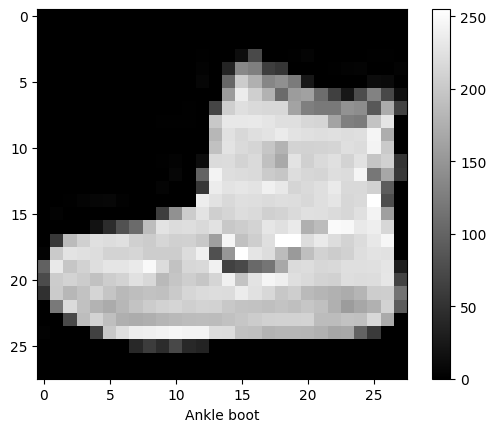

In [2]:
# 2. Fashion-MNIST 데이터 준비
# TensorFlow Keras에 내장된 Fashion-MNIST 데이터셋을 불러옵니다.
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 클래스 이름 정의 (0~9에 해당하는 패션 아이템)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 형태 확인 및 첫 번째 이미지 출력
# print(X_train.shape) # (60000, 28, 28)
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[0]])
plt.show()

In [3]:
# 3. 데이터 전처리
# 픽셀 값을 0~255에서 0~1 사이로 정규화합니다.
X_train = X_train / 255.0
X_test = X_test / 255.0

# CNN 입력을 위해 데이터 차원 변경 (채널 차원 추가)
# (60000, 28, 28) -> (60000, 28, 28, 1)
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [9]:
# 4. CNN 모델 생성
model = models.Sequential([
    # 첫 번째 CNN 블록
    # 32개의 3x3 필터를 사용하여 이미지 특징 추출. 입력 이미지 크기는 (28, 28, 1)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 이미지 크기를 절반으로 줄여 중요한 특징 강조
    layers.MaxPooling2D((2, 2)),

    # 두 번째 CNN 블록
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 최종 분류를 위해 1차원으로 펼치기
    layers.Flatten(),

     layers.Dropout(0.4),  # 40%의 연결을 끊어줌(과적합이 생겨서 추가함)

    # Dense 층 (분류기)
    layers.Dense(64, activation='relu'),
    # 10개 클래스에 대한 확률 출력
    layers.Dense(10, activation='softmax')
])

# 모델 구조 요약
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 5. 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# 6. 모델 학습
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=64, # 보통 CNN은 DNN보다 배치 사이즈를 크게 잡습니다
                    verbose=1)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7174 - loss: 0.7917 - val_accuracy: 0.8443 - val_loss: 0.4220
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8526 - loss: 0.4063 - val_accuracy: 0.8788 - val_loss: 0.3361
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8739 - loss: 0.3487 - val_accuracy: 0.8748 - val_loss: 0.3372
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8818 - loss: 0.3244 - val_accuracy: 0.8935 - val_loss: 0.2908
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8914 - loss: 0.2917 - val_accuracy: 0.8988 - val_loss: 0.2781
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8989 - loss: 0.2753 - val_accuracy: 0.9027 - val_loss: 0.2619
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9022 - loss: 0.2665 - val_accuracy: 0.9035 - val_loss: 0.2679
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9080 - loss: 0.2494 - val_accuracy: 0.

In [12]:
# 7. 모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"\n테스트 데이터 정확도: {accuracy:.4f}")

# 분류 보고서 출력
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\n[ 분류 보고서 ]")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

313/313 - 1s - 3ms/step - accuracy: 0.9123 - loss: 0.2565

테스트 데이터 정확도: 0.9123
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

[ 분류 보고서 ]
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.83      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.92      0.82      0.87      1000
       Dress       0.93      0.90      0.91      1000
        Coat       0.83      0.91      0.87      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.72      0.79      0.75      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



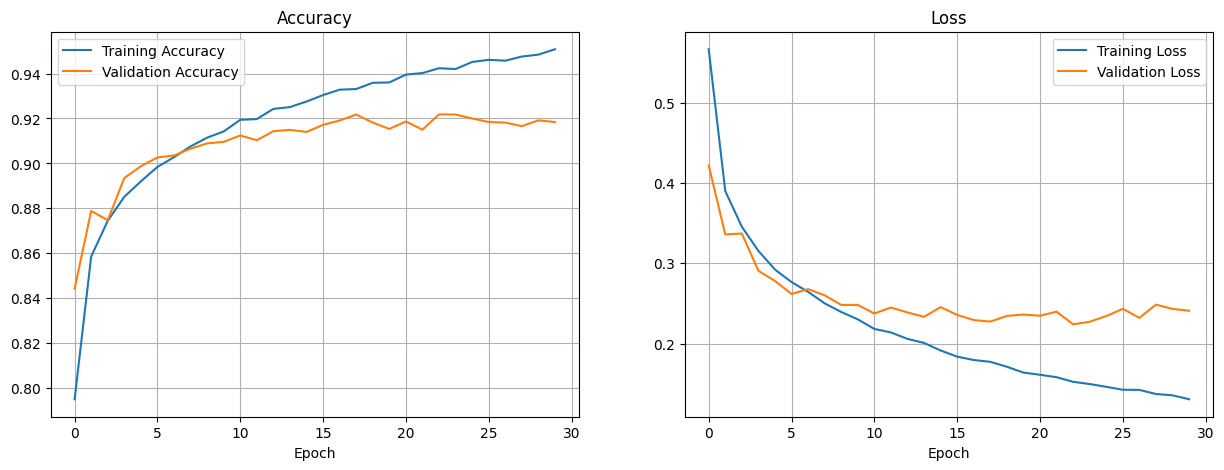

In [13]:
# 8. 학습 과정 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 정확도 그래프
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend()
ax1.grid(True)

# 손실 그래프
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss')
ax2.set_xlabel('Epoch')
ax2.legend()
ax2.grid(True)

plt.show()